In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# parquet 파일 데이터를 읽어온다.

In [3]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [4]:
# parquet 파일 데이터를 읽어온다.
# df1 = pd.read_parquet('open/train/1.회원정보/201807_train_회원정보.parquet')
# df1

#### 분석 전 주의사항

- 하나의 파일에서 작업을 다 하려고 하지 마세요
- 데이터를 읽어온 다음 데이터를 가공했다면 가공한 데이터를 파일로 저장하고 새로운 ipynb 파일을 만들어서 저장한 데이터를 읽어와서 작업하는 형태로 해주세요

### 데이터 불러오기

In [8]:
#201807~201812 마케팅 정보 train 데이터 병합
df1 = pd.read_parquet('open/train/7.마케팅정보/201807_train_마케팅정보.parquet')
df2 = pd.read_parquet('open/train/7.마케팅정보/201808_train_마케팅정보.parquet')
df3 = pd.read_parquet('open/train/7.마케팅정보/201809_train_마케팅정보.parquet')
df4 = pd.read_parquet('open/train/7.마케팅정보/201810_train_마케팅정보.parquet')
df5 = pd.read_parquet('open/train/7.마케팅정보/201811_train_마케팅정보.parquet')
df6 = pd.read_parquet('open/train/7.마케팅정보/201812_train_마케팅정보.parquet')

In [9]:
marketing_merged = pd.concat([df1,df2,df3,df4,df5,df6])
marketing_merged.to_parquet('open/train/7.마케팅정보//marketing_merged.parquet')

In [10]:
df = marketing_merged

### 세그먼트 컬럼 추가하기

In [12]:
#회원정보 데이터 불러오기
df1 = pd.read_parquet('open/train/1.회원정보/201807_train_회원정보.parquet')
df2 = pd.read_parquet('open/train/1.회원정보/201808_train_회원정보.parquet')
df3 = pd.read_parquet('open/train/1.회원정보/201809_train_회원정보.parquet')
df4 = pd.read_parquet('open/train/1.회원정보/201810_train_회원정보.parquet')
df5 = pd.read_parquet('open/train/1.회원정보/201811_train_회원정보.parquet')
df6 = pd.read_parquet('open/train/1.회원정보/201812_train_회원정보.parquet')

In [13]:
#회원정보 데이터 병합하기 
new_data = pd.concat([df1,df2,df3,df4,df5,df6])

In [14]:
#병합한 데이터 저장
new_data.to_parquet('open/train/1.회원정보/merged_data.parquet')

In [15]:
#기존 데이터프레임에 Segment 컬럼 추가하기
#추가하기 전 두 데이터프레임 행의 개수가 일치하는지 확인하기
len(df)

2400000

In [16]:
len(new_data)

2400000

In [17]:
df['Segment'] = new_data['Segment'].values

In [18]:
df

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,...,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,Segment
0,201807,TRAIN_000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,D
1,201807,TRAIN_000001,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15회 이상,10일 이상,E
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,C
3,201807,TRAIN_000003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,D
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201812,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E
399996,201812,TRAIN_399996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20회 이상,15일 이상,D
399997,201812,TRAIN_399997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,C
399998,201812,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E


### EDA

In [20]:
df.columns

Index(['기준년월', 'ID', '컨택건수_카드론_TM_B0M', '컨택건수_리볼빙_TM_B0M', '컨택건수_CA_TM_B0M',
       '컨택건수_이용유도_TM_B0M', '컨택건수_신용발급_TM_B0M', '컨택건수_부대서비스_TM_B0M',
       '컨택건수_포인트소진_TM_B0M', '컨택건수_보험_TM_B0M', '컨택건수_카드론_LMS_B0M',
       '컨택건수_CA_LMS_B0M', '컨택건수_리볼빙_LMS_B0M', '컨택건수_이용유도_LMS_B0M',
       '컨택건수_카드론_EM_B0M', '컨택건수_CA_EM_B0M', '컨택건수_리볼빙_EM_B0M',
       '컨택건수_이용유도_EM_B0M', '컨택건수_카드론_청구서_B0M', '컨택건수_CA_청구서_B0M',
       '컨택건수_리볼빙_청구서_B0M', '컨택건수_이용유도_청구서_B0M', '컨택건수_카드론_인터넷_B0M',
       '컨택건수_CA_인터넷_B0M', '컨택건수_리볼빙_인터넷_B0M', '컨택건수_이용유도_인터넷_B0M',
       '컨택건수_카드론_당사앱_B0M', '컨택건수_CA_당사앱_B0M', '컨택건수_리볼빙_당사앱_B0M',
       '컨택건수_이용유도_당사앱_B0M', '컨택건수_카드론_TM_R6M', '컨택건수_CA_TM_R6M',
       '컨택건수_리볼빙_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_신용발급_TM_R6M',
       '컨택건수_부대서비스_TM_R6M', '컨택건수_포인트소진_TM_R6M', '컨택건수_보험_TM_R6M',
       '컨택건수_카드론_LMS_R6M', '컨택건수_CA_LMS_R6M', '컨택건수_리볼빙_LMS_R6M',
       '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_EM_R6M', '컨택건수_CA_EM_R6M',
       '컨택건수_리볼빙_EM_R6M', '컨택건수_이용유도_EM_R6M', '컨택건수_카드론_청구서_R6M

In [21]:
df.describe()

,기준년월,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,컨택건수_카드론_LMS_B0M,...,컨택건수_리볼빙_인터넷_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_카드론_당사앱_R6M,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M
count,2.400000e+06,2.400000e+06,2.400000e+06,2400000.0,2.400000e+06,2.400000e+06,2.400000e+06,2400000.0,2.400000e+06,2.400000e+06,...,2400000.0,2.400000e+06,2400000.0,2400000.0,2400000.0,2.400000e+06,2.400000e+06,2400000.0,2.400000e+06,2400000.0
mean,2.018095e+05,1.657625e-01,6.666667e-06,0.0,7.920292e-02,2.500000e-06,4.166667e-07,0.0,1.316500e-02,4.089167e-03,...,0.0,2.359363e+00,0.0,0.0,0.0,7.004167e-04,2.744625e-02,0.0,4.281692e-01,0.0
std,1.707825e+00,6.976548e-01,3.162271e-03,0.0,4.768350e-01,1.581137e-03,6.454972e-04,0.0,1.139811e-01,6.381573e-02,...,0.0,2.087587e+00,0.0,0.0,0.0,4.600645e-02,3.823193e-01,0.0,2.160925e+00,0.0
min,2.018070e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
25%,2.018080e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
50%,2.018095e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,2.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
75%,2.018110e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,4.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
max,2.018120e+05,4.000000e+00,2.000000e+00,0.0,3.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,...,0.0,9.000000e+00,0.0,0.0,0.0,4.000000e+00,8.000000e+00,0.0,3.900000e+01,0.0


In [22]:
#결측치 확인
df.isnull().sum()

기준년월               0
ID                 0
컨택건수_카드론_TM_B0M    0
컨택건수_리볼빙_TM_B0M    0
컨택건수_CA_TM_B0M     0
                  ..
컨택건수_채권_R6M        0
컨택건수_FDS_R6M       0
캠페인접촉건수_R12M       0
캠페인접촉일수_R12M       0
Segment            0
Length: 65, dtype: int64

In [23]:
#Segment 분포 확인
df['Segment'].value_counts()

Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64

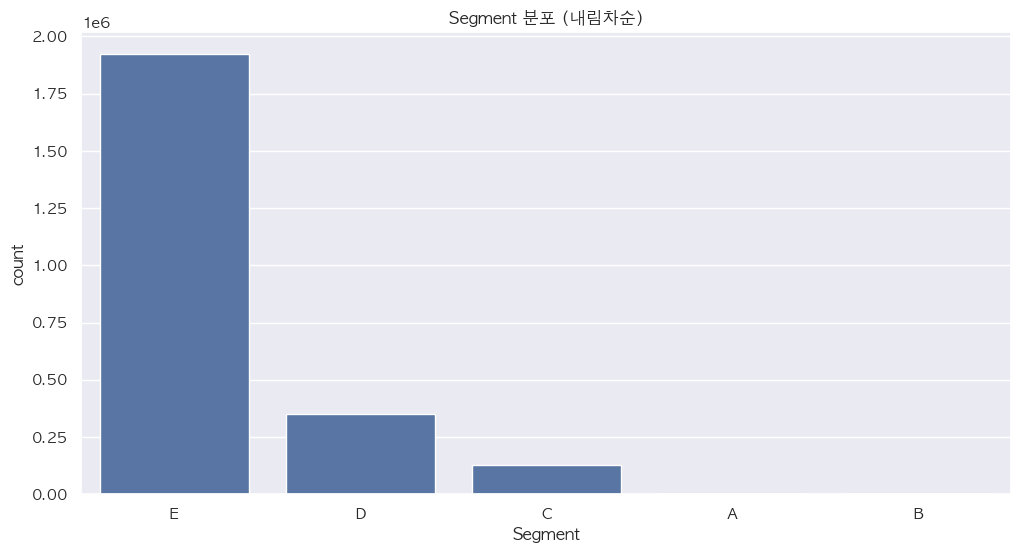

In [24]:
# 1. 내림차순 정렬된 Segment 순서 추출
order = df['Segment'].value_counts().sort_values(ascending=False).index

# 2. countplot에서 order=로 순서 지정
sns.countplot(data=df, x='Segment', order=order)
plt.title('Segment 분포 (내림차순)')
plt.show()

In [25]:
df['Segment'].value_counts(normalize=True)

Segment
E    0.800855
D    0.145517
C    0.053163
A    0.000405
B    0.000060
Name: proportion, dtype: float64

- Segment 수 E > D > C 
- E가 압도적으로 많음
- 클래스 간 불균형이 심함

## TM(=텔레 마케팅) 

In [28]:
#TM(=Tele Marketing), 전화, 팩스 등을 이용하여 상품이나 서비스를 홍보하거나 판매하는 마케팅 활동

In [29]:
#컬럼명에 'TM'이 들어가있는 것만 추출
tm_cols = [col for col in df.columns if '_TM_' in col]

In [30]:
df_tm = df[df['Segment'].isin(['A','B','C', 'D', 'E'])] 
segment_tm_mean = df_tm.groupby('Segment')[tm_cols].mean().T

# TM 채널 관련 변수들 중 상위 5개 변수만 보기
segment_tm_mean.sort_values(by='E', ascending=False).head(5)

Segment,A,B,C,D,E
컨택건수_카드론_TM_R6M,1.226337,1.583333,1.505040,1.748120,1.874827
컨택건수_이용유도_TM_R6M,0.203704,0.541667,0.399545,0.581748,1.291629
컨택건수_보험_TM_R6M,0.431070,0.645833,0.435199,0.447870,0.516140
컨택건수_카드론_TM_B0M,0.066872,0.125000,0.139925,0.168903,0.166960
컨택건수_이용유도_TM_B0M,0.000000,0.000000,0.003660,0.009733,0.096887


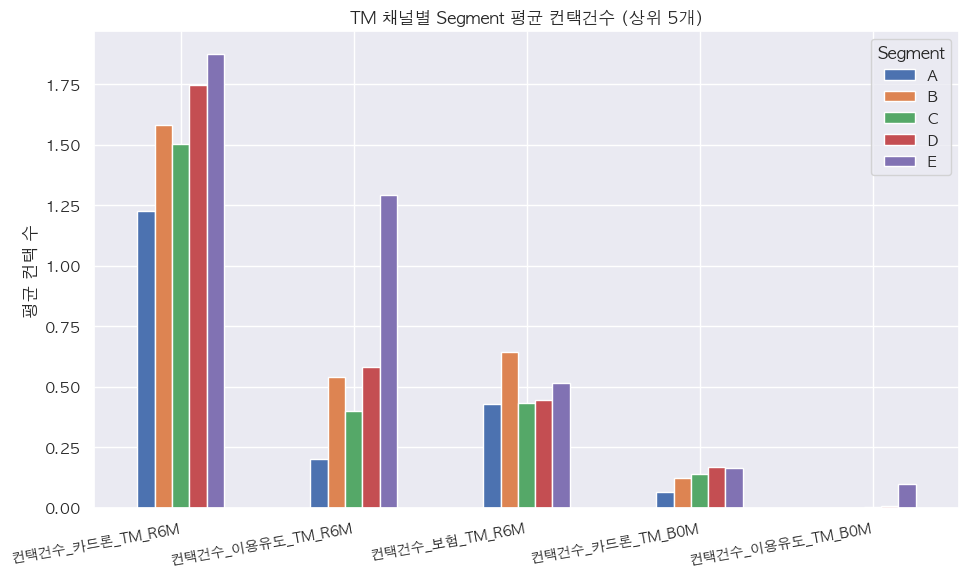

In [31]:
import matplotlib.pyplot as plt

# 상위 5개 변수
top_vars = segment_tm_mean.sort_values(by='E', ascending=False).head(5)

top_vars.plot(kind='bar', figsize=(10, 6))
plt.title('TM 채널별 Segment 평균 컨택건수 (상위 5개)')
plt.ylabel('평균 컨택 수')
plt.xticks(rotation=10, ha='right', fontsize=10) #x축을 조금 오른쪽으로 배치하고 싶은데 잘 모르겠다 
plt.tight_layout()
plt.show()


- Segment E는 카드론, 이용유도에서 타 고객들보다 컨택 건수가 높음
- `컨택건수_이용유도_TM_R6M`은 E가 압도적으로 높음
- `컨택건수_보험_TM_R6M`은 B > E

## LMS(=Long Message Service), 장문 문자 서비스 

In [34]:
#컬럼명에 'LMS'이 들어가있는 것만 추출
lms_cols = [col for col in df.columns if '_LMS_' in col]

In [35]:
df_lms = df[df['Segment'].isin(['A','B','C', 'D', 'E'])] 
segment_lms_mean = df_lms.groupby('Segment')[lms_cols].mean().T

# TM 채널 관련 변수들 중 상위 5개 변수만 보기
segment_lms_mean.sort_values(by='E', ascending=False).head(5)

Segment,A,B,C,D,E
컨택건수_이용유도_LMS_R6M,3.848765,5.715278,3.709507,3.662689,3.488987
컨택건수_이용유도_LMS_B0M,0.886831,1.291667,0.749259,0.728627,0.631678
컨택건수_CA_LMS_R6M,0.240741,0.222222,0.219962,0.277249,0.282035
컨택건수_카드론_LMS_R6M,0.030864,0.097222,0.062387,0.086882,0.094788
컨택건수_리볼빙_LMS_R6M,0.005144,0.000000,0.004240,0.005624,0.004276


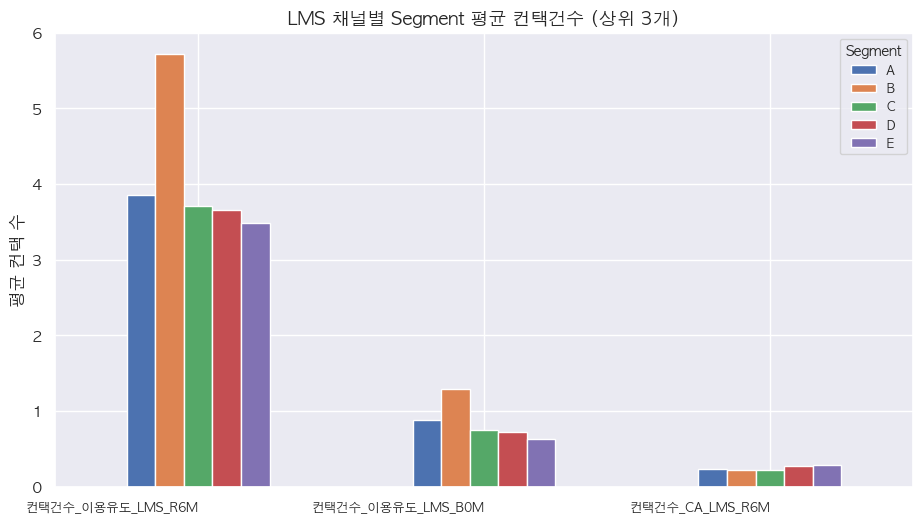

In [36]:
# 상위 3개 LMS 변수 (E 기준으로 내림차순 정렬)
top_lms_vars = segment_lms_mean.sort_values(by='E', ascending=False).head(3)
# 시각화
ax = top_lms_vars.plot(kind='bar', figsize=(10, 6))

# 제목, 축 라벨 등 설정
ax.set_title('LMS 채널별 Segment 평균 컨택건수 (상위 3개)', fontsize=13, loc='center')
ax.set_ylabel('평균 컨택 수')
# x축 텍스트 설정
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right', fontsize=9)

# 범례
plt.legend(title='Segment', fontsize=9, title_fontsize=10)
plt.grid(True)
plt.tight_layout(pad=2.5)
plt.show()


- `컨택건수_이용유도_R6M`, `컨택건수_이용유도_B0M` 모두 세그먼트 B가 가장 높음
- `컨태건수_CA_LMS_R6M`은 E가 가장 높음

TM vs LMS 비교
- TM 채널에서는 Segment E의 평균 컨택건수가 가장 높아, 주 대상 고객군으로 집중된 경향이 뚜렷하다.
- 반면 LMS 채널에서는 Segment C의 평균 컨택건수가 가장 높지만, 세그먼트 간 격차가 크지는 않아 비교적 균형적으로 분포된 것으로 보인다.


## 단기BOM vs 장기R6M 채권 평균컨택건수 비교

In [40]:
# 1. 채권 관련 단기(B0M) 및 장기(R6M) 컬럼 추출
short_term_cols = [col for col in df.columns if '_채권_B0M' in col]
long_term_cols = [col for col in df.columns if '_채권_R6M' in col]

# 2. 전체 세그먼트 기준 평균값 계산
short_term_mean = df.groupby('Segment')[short_term_cols].mean()
long_term_mean = df.groupby('Segment')[long_term_cols].mean()

# 3. 단기/장기 컬럼 이름을 동일하게 정리 (ex: 채권_B0M → 채권)
short_term_mean.columns = [col.replace('_채권_B0M', '') for col in short_term_mean.columns]
long_term_mean.columns = [col.replace('_채권_R6M', '') for col in long_term_mean.columns]

# 4. 단기 vs 장기 평균값을 세그먼트별로 비교 (변수 기준으로 보기 위해 전치)
compare_all_segments = pd.concat([
    short_term_mean.T.rename(columns=lambda x: f'{x}_B0M'),
    long_term_mean.T.rename(columns=lambda x: f'{x}_R6M')
], axis=1)

# 5. 결과 확인
display(compare_all_segments)

Segment,A_B0M,B_B0M,C_B0M,D_B0M,E_B0M,A_R6M,B_R6M,C_R6M,D_R6M,E_R6M
컨택건수,0.005144,0.0,0.031515,0.035059,0.025806,0.316872,0.375,0.515464,0.544966,0.401212


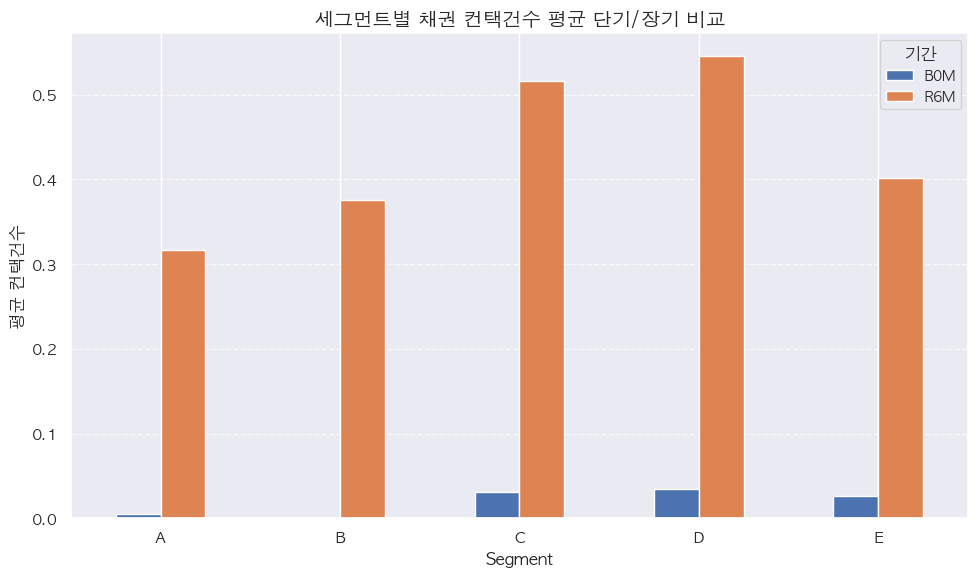

In [178]:
#시각화
# 1. 데이터 구성 (출력된 값 기반)
data = {
    'A': [0.005144, 0.316872],
    'B': [0.0, 0.375],
    'C': [0.031515, 0.515464],
    'D': [0.035059, 0.544966],
    'E': [0.025806, 0.401212]
}
df_plot = pd.DataFrame(data, index=['B0M', 'R6M']).T  # index: Segment

# 2. 시각화
df_plot.plot(kind='bar', figsize=(10, 6))

plt.title('세그먼트별 채권 컨택건수 평균 단기/장기 비교', fontsize=14)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('평균 컨택건수', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='기간', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- C, D 세그먼트는 단기 채권 컨택건수 평균이 상대적으로 높음. 최근 연체 발생 또는 리스크 관리 중일 가능성이 있음.
- 반면, A, B 세그먼트는 단기 채권 컨택건수가 매우 적거나 없어, 상환 우수 고객이거나 반대로 컨택 대상에서 제외된 고객일 수 있음.
- 컨택 데이터만으로는 상환 여부를 단정하기 어렵기 때문에 연체 정보나 고객 상태 데이터를 함께 확인할 필요가 있음.

## 단기 vs 장기 FDS(사기탐지거래) 컨택건수 비교

In [181]:
df['컨택건수_FDS_R6M'].unique()

array([0])

In [182]:
df['컨택건수_FDS_B0M'].unique()

array([0])

- 단기, 장기 모두 FDS 컨택건수가 0인 상태

In [184]:
df.columns

Index(['기준년월', 'ID', '컨택건수_카드론_TM_B0M', '컨택건수_리볼빙_TM_B0M', '컨택건수_CA_TM_B0M',
       '컨택건수_이용유도_TM_B0M', '컨택건수_신용발급_TM_B0M', '컨택건수_부대서비스_TM_B0M',
       '컨택건수_포인트소진_TM_B0M', '컨택건수_보험_TM_B0M', '컨택건수_카드론_LMS_B0M',
       '컨택건수_CA_LMS_B0M', '컨택건수_리볼빙_LMS_B0M', '컨택건수_이용유도_LMS_B0M',
       '컨택건수_카드론_EM_B0M', '컨택건수_CA_EM_B0M', '컨택건수_리볼빙_EM_B0M',
       '컨택건수_이용유도_EM_B0M', '컨택건수_카드론_청구서_B0M', '컨택건수_CA_청구서_B0M',
       '컨택건수_리볼빙_청구서_B0M', '컨택건수_이용유도_청구서_B0M', '컨택건수_카드론_인터넷_B0M',
       '컨택건수_CA_인터넷_B0M', '컨택건수_리볼빙_인터넷_B0M', '컨택건수_이용유도_인터넷_B0M',
       '컨택건수_카드론_당사앱_B0M', '컨택건수_CA_당사앱_B0M', '컨택건수_리볼빙_당사앱_B0M',
       '컨택건수_이용유도_당사앱_B0M', '컨택건수_카드론_TM_R6M', '컨택건수_CA_TM_R6M',
       '컨택건수_리볼빙_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_신용발급_TM_R6M',
       '컨택건수_부대서비스_TM_R6M', '컨택건수_포인트소진_TM_R6M', '컨택건수_보험_TM_R6M',
       '컨택건수_카드론_LMS_R6M', '컨택건수_CA_LMS_R6M', '컨택건수_리볼빙_LMS_R6M',
       '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_EM_R6M', '컨택건수_CA_EM_R6M',
       '컨택건수_리볼빙_EM_R6M', '컨택건수_이용유도_EM_R6M', '컨택건수_카드론_청구서_R6M

## 세그먼트별 부대서비스 TM채널 마케팅 평균 노출 건수 비교

In [231]:
df.groupby('Segment')[['컨택건수_부대서비스_TM_R6M']].mean()

,컨택건수_부대서비스_TM_R6M
Segment,
A,0.033951
B,0.152778
C,0.046383
D,0.054736
E,0.056545


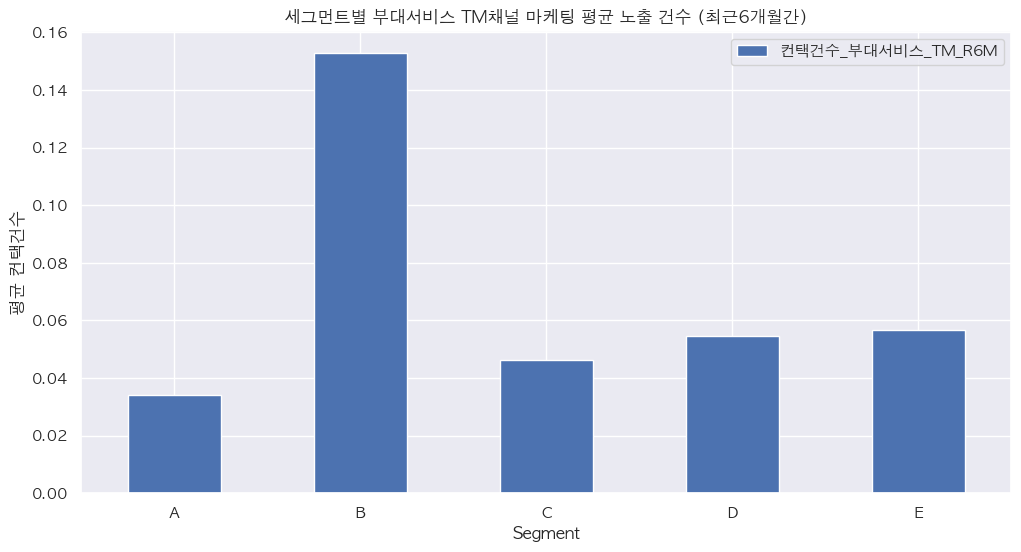

In [232]:
import matplotlib.pyplot as plt

df.groupby('Segment')[['컨택건수_부대서비스_TM_R6M']].mean().plot(kind='bar')
plt.title("세그먼트별 부대서비스 TM채널 마케팅 평균 노출 건수 (최근6개월간)")
plt.ylabel("평균 컨택건수")
plt.xticks(rotation=0)
plt.show()


- 분석 결과, 세그먼트 B는 최근 6개월간 부대서비스 마케팅 컨택 건수가 가장 높음
- 세그먼트 B는 부가서비스 혜택에 민감하거나 타겟 마케팅 우선 순위에 포함된 집단일 가능성을 시사함. 
- 세그먼트 A, C, D, E는 상대적으로 낮은 컨택 평균을 보이며, 상품 유형이나 채널 전략을 달리 가져갈 필요가 있음

## 세그먼트별 캠페인 접촉건수/접촉일수 평균 비교

In [190]:
df['캠페인접촉건수_R12M'].unique()

array([ 1., 15., 10.,  5., 20., 25.])

In [191]:
df['캠페인접촉일수_R12M'].unique()

array([ 1., 10.,  5., 15., 20.])

In [192]:
# 문자열이기 때문에 문자열에서 숫자만 뽑아준다.
df['캠페인접촉건수_R12M'] = df['캠페인접촉건수_R12M'].astype(str).str.extract('(\d+)').astype(float)  #수치형데이터로 변환
df['캠페인접촉일수_R12M'] = df['캠페인접촉일수_R12M'].astype(str).str.extract('(\d+)').astype(float)

In [193]:
df.groupby('Segment')[['캠페인접촉건수_R12M', '캠페인접촉일수_R12M']].mean()

,캠페인접촉건수_R12M,캠페인접촉일수_R12M
Segment,,
A,2.519547,2.389918
B,2.972222,2.673611
C,2.896755,2.685069
D,3.194284,2.958513
E,3.265033,3.036721


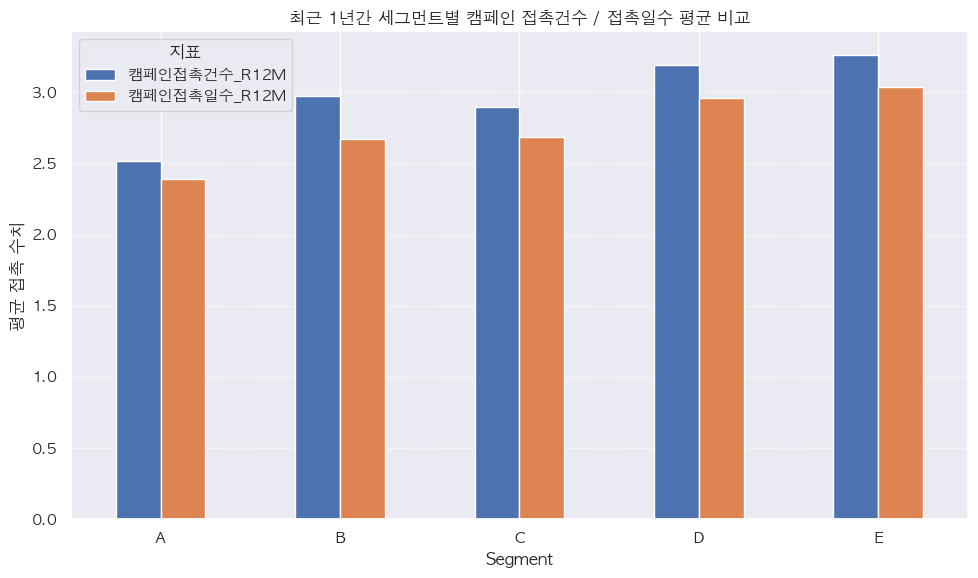

In [237]:
campaign_mean = df.groupby('Segment')[['캠페인접촉건수_R12M', '캠페인접촉일수_R12M']].mean()
campaign_mean.plot(kind='bar', figsize=(10, 6))
plt.title('최근 1년간 세그먼트별 캠페인 접촉건수 / 접촉일수 평균 비교')
plt.ylabel('평균 접촉 수치')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.legend(title='지표')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- 세그먼트 E는 캠페인 접촉건수와 접촉일수 모두 가장 높음 (마케팅의 핵심 타깃군일 가능성이 큼)
- 세그먼트 D는 E에 이어 두 번째로 높은 접촉 수준을 보임 
- 세그먼트 A는 두 지표 모두 가장 낮음 → 현재 마케팅에서 비주요 타깃으로 분류되었을 가능성 높음

## 세그먼트별 보험 TM채널 마케팅 노출 건수 비교(단기/장기)

In [198]:
[col for col in df.columns if '보험' in col]

['컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M']

In [199]:
df.groupby('Segment')[['컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M']].mean()

,컨택건수_보험_TM_B0M,컨택건수_보험_TM_R6M
Segment,,
A,0.013374,0.431070
B,0.048611,0.645833
C,0.013073,0.435199
D,0.013174,0.447870
E,0.013167,0.516140


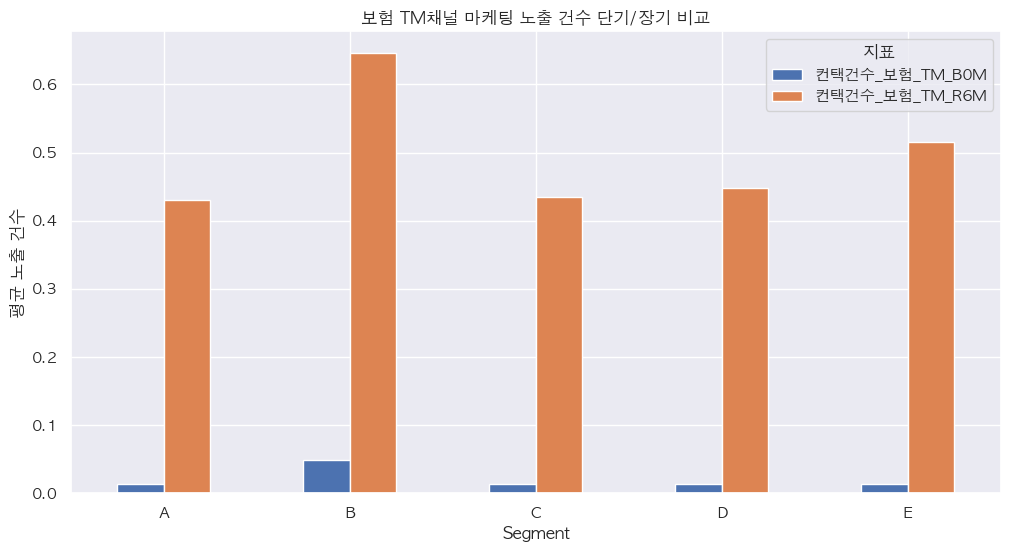

In [239]:
insurance_mean = df.groupby('Segment')[['컨택건수_보험_TM_B0M', '컨택건수_보험_TM_R6M']].mean()
insurance_mean.plot(kind='bar')  
plt.title('보험 TM채널 마케팅 노출 건수 단기/장기 비교')
plt.ylabel('평균 노출 건수')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.legend(title='지표')
plt.show()

- 세그먼트 B는 단기/장기 모두 보험 마케팅 노출 건수가 가장 높음
- 세그먼트 B는 보험 마케팅의 핵심 타깃일 가능성이 높음
- 세그먼트 E의 보험 마케팅 노출 건수가 두 번째로 높음 

## 카드론

In [ ]:
## 카드론, CA, 리볼빙 분석 진행

In [241]:
[col for col in df.columns if '카드론' in col]

['컨택건수_카드론_TM_B0M',
 '컨택건수_카드론_LMS_B0M',
 '컨택건수_카드론_EM_B0M',
 '컨택건수_카드론_청구서_B0M',
 '컨택건수_카드론_인터넷_B0M',
 '컨택건수_카드론_당사앱_B0M',
 '컨택건수_카드론_TM_R6M',
 '컨택건수_카드론_LMS_R6M',
 '컨택건수_카드론_EM_R6M',
 '컨택건수_카드론_청구서_R6M',
 '컨택건수_카드론_인터넷_R6M',
 '컨택건수_카드론_당사앱_R6M']

In [260]:
# Step 1. 카드론 컬럼 필터
cardloan_cols = [col for col in df.columns if '카드론' in col]

,TM_R6M,카드론_TM_R6M,카드론_장기컨택건수
Segment,,,
A,1.226337,1.226337,1.389918
B,1.583333,1.583333,1.861111
C,1.505040,1.505040,1.676221
D,1.748120,1.748120,1.952320
E,1.874827,1.874827,2.073675


In [262]:
[col for col in df.columns if 'CA' in col]

['컨택건수_CA_TM_B0M',
 '컨택건수_CA_LMS_B0M',
 '컨택건수_CA_EM_B0M',
 '컨택건수_CA_청구서_B0M',
 '컨택건수_CA_인터넷_B0M',
 '컨택건수_CA_당사앱_B0M',
 '컨택건수_CA_TM_R6M',
 '컨택건수_CA_LMS_R6M',
 '컨택건수_CA_EM_R6M',
 '컨택건수_CA_청구서_R6M',
 '컨택건수_CA_인터넷_R6M',
 '컨택건수_CA_당사앱_R6M']

In [264]:
[col for col in df.columns if '리볼빙' in col]

['컨택건수_리볼빙_TM_B0M',
 '컨택건수_리볼빙_LMS_B0M',
 '컨택건수_리볼빙_EM_B0M',
 '컨택건수_리볼빙_청구서_B0M',
 '컨택건수_리볼빙_인터넷_B0M',
 '컨택건수_리볼빙_당사앱_B0M',
 '컨택건수_리볼빙_TM_R6M',
 '컨택건수_리볼빙_LMS_R6M',
 '컨택건수_리볼빙_EM_R6M',
 '컨택건수_리볼빙_청구서_R6M',
 '컨택건수_리볼빙_인터넷_R6M',
 '컨택건수_리볼빙_당사앱_R6M']